In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/insurance_claims.csv')

In [ ]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [ ]:
df.replace('?', np.nan, inplace = True)

In [ ]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [ ]:
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [ ]:
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

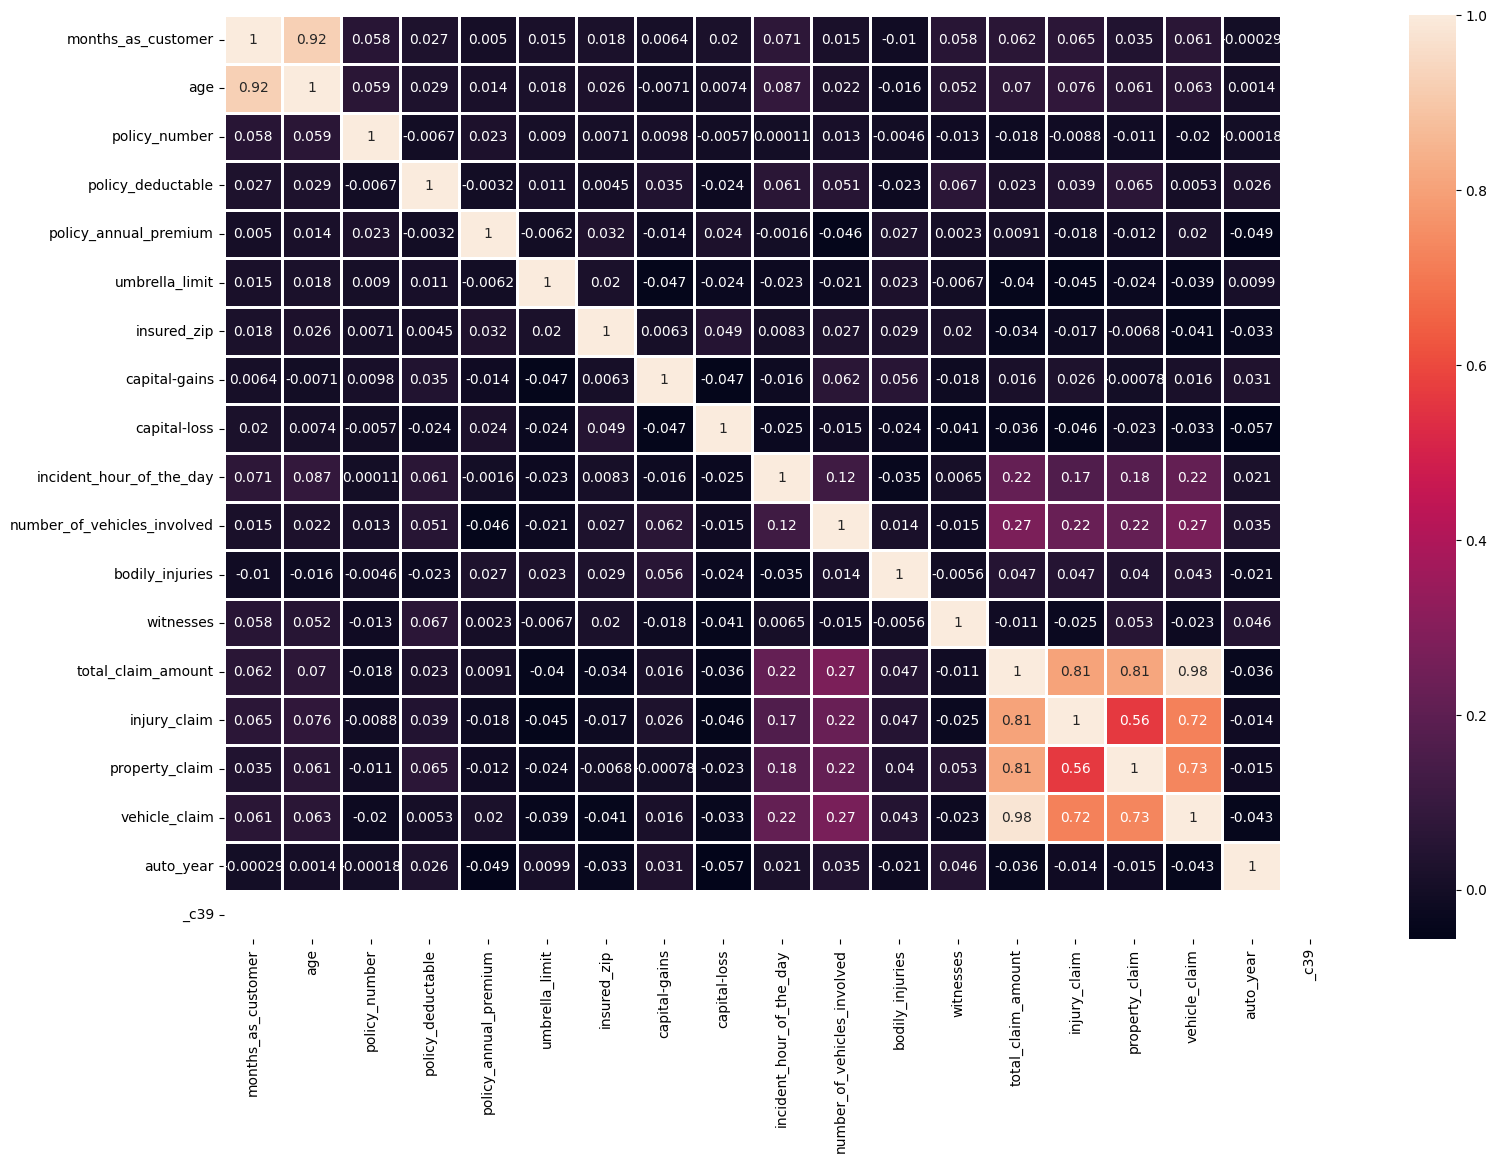

In [ ]:
plt.figure(figsize = (18, 12))

corr = df.corr()

sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

In [ ]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [ ]:
to_drop = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',
           'incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year', '_c39']

df.drop(to_drop, inplace = True, axis = 1)
df.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,...,1,NO,0,0,NO,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,...,1,NO,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,...,1,NO,0,1,NO,6500,1300,650,4550,N


In [ ]:
df.drop(columns = ['age', 'total_claim_amount'], inplace = True, axis = 1)

In [ ]:
X = df.drop('fraud_reported', axis = 1)
y = df['fraud_reported']

In [ ]:
cat_df = X.select_dtypes(include = ['object'])
cat_df.head()

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available
0,250/500,MALE,MD,craft-repair,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES
1,250/500,MALE,MD,machine-op-inspct,other-relative,Vehicle Theft,Rear Collision,Minor Damage,Police,NO,NO
2,100/300,FEMALE,PhD,sales,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO
3,250/500,FEMALE,PhD,armed-forces,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,NO,NO
4,500/1000,MALE,Associate,sales,unmarried,Vehicle Theft,Rear Collision,Minor Damage,None,NO,NO


In [ ]:
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")


policy_csl: 
['250/500' '100/300' '500/1000']

insured_sex: 
['MALE' 'FEMALE']

insured_education_level: 
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']

insured_occupation: 
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']

insured_relationship: 
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']

incident_type: 
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']

collision_type: 
['Side Collision' 'Rear Collision' 'Front Collision']

incident_severity: 
['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']

authorities_contacted: 
['Police' 'None' 'Fire' 'Other' 'Ambulance']

property_damage: 
['YES' 'NO']

police_report_available: 
['YES' 'NO']



In [ ]:
cat_df = pd.get_dummies(cat_df, drop_first = True)
cat_df.head()

,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,1,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,1
1,1,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
4,0,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [ ]:
num_df = X.select_dtypes(include = ['int64'])
num_df.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
0,328,1000,0,53300,0,5,1,1,2,6510,13020,52080
1,228,2000,5000000,0,0,8,1,0,0,780,780,3510
2,134,2000,5000000,35100,0,7,3,2,3,7700,3850,23100
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,6340,50720
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,650,4550


Skipping policy_csl - Non-numeric data
Skipping insured_sex - Non-numeric data
Skipping insured_education_level - Non-numeric data
Skipping insured_occupation - Non-numeric data
Skipping insured_relationship - Non-numeric data
Skipping incident_type - Non-numeric data
Skipping collision_type - Non-numeric data
Skipping incident_severity - Non-numeric data
Skipping authorities_contacted - Non-numeric data
Skipping property_damage - Non-numeric data
Skipping police_report_available - Non-numeric data


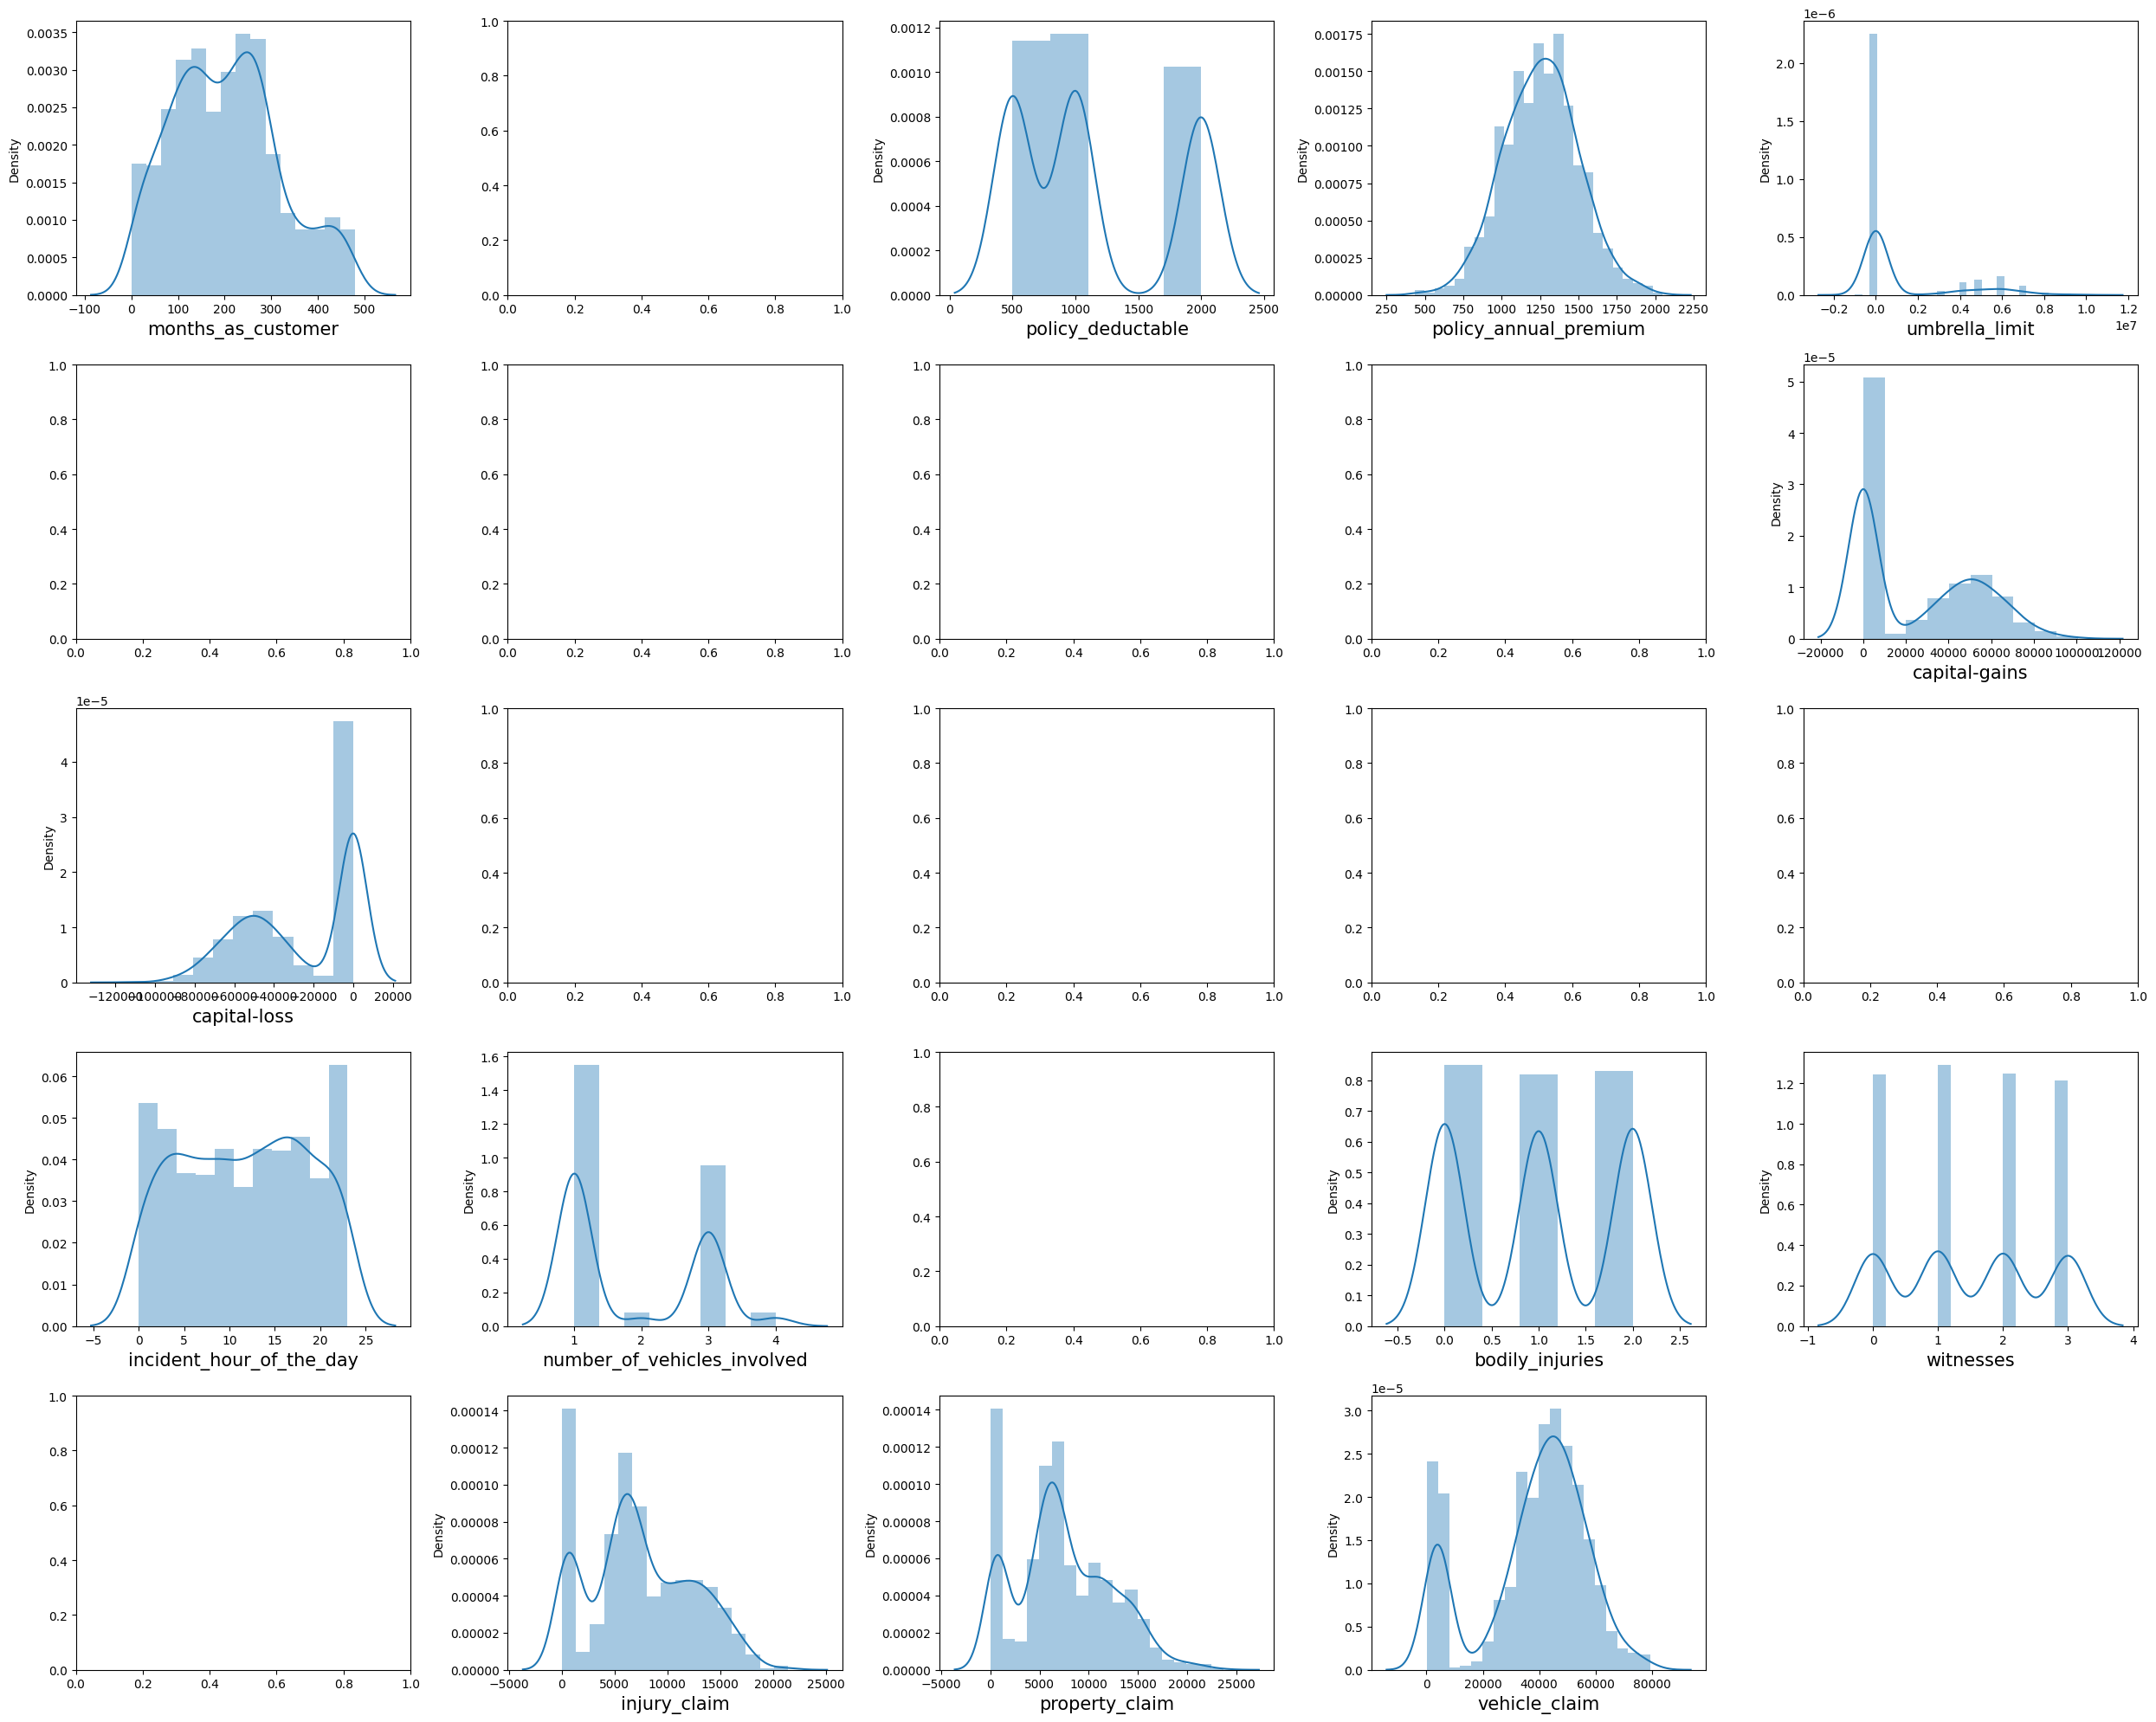

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(25, 20))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)

        # Check if the column contains numeric data
        if X[col].dtype in [int, float]:
            sns.distplot(X[col])
            plt.xlabel(col, fontsize=15)
        else:
            print(f"Skipping {col} - Non-numeric data")

    plotnumber += 1

plt.tight_layout()
plt.show()

##MODEL##

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
X_train.head()
dataframe_num= X_train[['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
       'vehicle_claim']]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataframe_num)
scaled_dataframe_num = pd.DataFrame(data = scaled_data, columns = dataframe_num.columns, index = X_train.index)
scaled_dataframe_num.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
500,-1.759129,-1.053838,-0.480535,0.994090,0.979252,0.474554,-0.849529,1.192288,1.358330,0.089679,3.329127,0.903874
855,-0.015390,-0.240691,-0.480535,-0.886555,0.979252,-0.100663,1.090035,-0.024332,1.358330,-0.400416,-0.396862,0.019519
333,-0.873982,-0.240691,-0.480535,-0.886555,0.979252,-1.107293,-0.849529,1.192288,0.455185,-1.403069,-1.403166,-1.896583
806,-1.369664,-0.240691,-0.480535,-0.886555,0.979252,-1.538706,-0.849529,-1.240953,-0.447960,0.610405,-0.452199,-0.079971
679,-0.457963,-1.053838,-0.480535,1.185037,-2.353329,-1.107293,1.090035,1.192288,0.455185,-0.692431,-0.689941,-0.721128


In [ ]:
X_train.drop(columns = scaled_dataframe_num.columns, inplace = True)
X_train = pd.concat([scaled_dataframe_num, X_train], axis = 1)
X_train.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available
500,-1.759129,-1.053838,-0.480535,0.994090,0.979252,0.474554,-0.849529,1.192288,1.358330,0.089679,...,FEMALE,JD,craft-repair,other-relative,Single Vehicle Collision,Side Collision,Minor Damage,Police,NO,YES
855,-0.015390,-0.240691,-0.480535,-0.886555,0.979252,-0.100663,1.090035,-0.024332,1.358330,-0.400416,...,MALE,High School,armed-forces,own-child,Multi-vehicle Collision,Rear Collision,Total Loss,Fire,NO,YES
333,-0.873982,-0.240691,-0.480535,-0.886555,0.979252,-1.107293,-0.849529,1.192288,0.455185,-1.403069,...,FEMALE,MD,prof-specialty,husband,Parked Car,Rear Collision,Trivial Damage,None,NO,NO
806,-1.369664,-0.240691,-0.480535,-0.886555,0.979252,-1.538706,-0.849529,-1.240953,-0.447960,0.610405,...,MALE,College,prof-specialty,wife,Single Vehicle Collision,Side Collision,Major Damage,Fire,YES,YES
679,-0.457963,-1.053838,-0.480535,1.185037,-2.353329,-1.107293,1.090035,1.192288,0.455185,-0.692431,...,FEMALE,Masters,farming-fishing,own-child,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NO,NO


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(criterion= 'entropy', max_depth= 10, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 3, n_estimators= 140)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

acc_rfc_train = accuracy_score(y_train, rfc.predict(X_train))
acc_rfc_test = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Random Forest is : {acc_rfc_train}")
print(f"Test accuracy of Random Forest is : {acc_rfc_test}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

ValueError: ignored

In [ ]:
numeric_columns = X_train.select_dtypes(include=[np.number]).columns
non_numeric_columns = X_train.columns.difference(numeric_columns)

# Check unique values in non-numeric columns
for col in non_numeric_columns:
    unique_values = X_train[col].unique()
    print(f"{col}: {unique_values}")

authorities_contacted: ['Police' 'Fire' 'None' 'Other' 'Ambulance']
collision_type: ['Side Collision' 'Rear Collision' 'Front Collision']
incident_severity: ['Minor Damage' 'Total Loss' 'Trivial Damage' 'Major Damage']
incident_type: ['Single Vehicle Collision' 'Multi-vehicle Collision' 'Parked Car'
 'Vehicle Theft']
insured_education_level: ['JD' 'High School' 'MD' 'College' 'Masters' 'Associate' 'PhD']
insured_occupation: ['craft-repair' 'armed-forces' 'prof-specialty' 'farming-fishing'
 'exec-managerial' 'transport-moving' 'priv-house-serv' 'tech-support'
 'machine-op-inspct' 'sales' 'other-service' 'adm-clerical'
 'protective-serv' 'handlers-cleaners']
insured_relationship: ['other-relative' 'own-child' 'husband' 'wife' 'unmarried' 'not-in-family']
insured_sex: ['FEMALE' 'MALE']
police_report_available: ['YES' 'NO']
policy_csl: ['500/1000' '250/500' '100/300']
property_damage: ['NO' 'YES']


In [ ]:
X_train['policy_csl'] = X_train['policy_csl'].apply(lambda x: np.mean(list(map(int, x.split('/')))) if '/' in x else x).astype(float)

# Print unique values again to verify
unique_values_policy_csl = X_train['policy_csl'].unique()
print(f"policy_csl: {unique_values_policy_csl}")

policy_csl: [750. 375. 200.]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming you have already loaded and preprocessed your data (X_train, X_test, y_train, y_test)

# Create instances of the classifiers
dt_classifier = DecisionTreeClassifier(random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)
gb_classifier = GradientBoostingClassifier(random_state=42)
xgb_classifier = XGBClassifier(random_state=42)

classifiers = [dt_classifier, rf_classifier, gb_classifier, xgb_classifier]

# Train and evaluate each classifier
results = []

for classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cv_pred = cross_val_predict(classifier, X_train, y_train, cv=5)
    cv_matrix = confusion_matrix(y_train, cv_pred)
    results.append({
        'Classifier': type(classifier).__name__,
        'Accuracy': accuracy,
        'Confusion_Matrix': cv_matrix
    })

# Display the results
for result in results:
    print(f"\nClassifier: {result['Classifier']}")
    print(f"Accuracy: {result['Accuracy']:.4f}")
    print("Confusion Matrix:")
    print(result['Confusion_Matrix'])
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Create a DataFrame for the comparison
result_df = pd.DataFrame(results)

# Compare classifiers with a pie chart
plt.figure(figsize=(8, 8))
plt.pie(result_df['Accuracy'], labels=result_df['Classifier'], autopct='%1.1f%%', startangle=140)
plt.title('Classifier Comparison')
plt.show()

ValueError: ignored

In [ ]:
from sklearn.preprocessing import OneHotEncoder

categorical_columns = X_train.select_dtypes(include='object').columns

encoder = OneHotEncoder(drop='first', sparse=False)
X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[categorical_columns]))
X_test_encoded = pd.DataFrame(encoder.transform(X_test[categorical_columns]))

X_train = pd.concat([X_train.drop(categorical_columns, axis=1), X_train_encoded], axis=1)
X_test = pd.concat([X_test.drop(categorical_columns, axis=1), X_test_encoded], axis=1)


In [ ]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [ ]:
from sklearn.impute import SimpleImputer

# Assuming X_train and X_test include missing values

# Create an imputer with a strategy (e.g., mean, median, or most frequent)
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the training data
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Transform the test data using the trained imputer
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

ValueError: ignored

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming you have already loaded and preprocessed your data (X_train, X_test, y_train, y_test)

# Create instances of the classifiers
dt_classifier = DecisionTreeClassifier(random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)
gb_classifier = GradientBoostingClassifier(random_state=42)
xgb_classifier = XGBClassifier(random_state=42)

classifiers = [dt_classifier, rf_classifier, gb_classifier, xgb_classifier]

# Train and evaluate each classifier
results = []

for classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cv_pred = cross_val_predict(classifier, X_train, y_train, cv=5)
    cv_matrix = confusion_matrix(y_train, cv_pred)
    results.append({
        'Classifier': type(classifier).__name__,
        'Accuracy': accuracy,
        'Confusion_Matrix': cv_matrix
    })

# Display the results
for result in results:
    print(f"\nClassifier: {result['Classifier']}")
    print(f"Accuracy: {result['Accuracy']:.4f}")
    print("Confusion Matrix:")
    print(result['Confusion_Matrix'])
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Create a DataFrame for the comparison
result_df = pd.DataFrame(results)

# Compare classifiers with a pie chart
plt.figure(figsize=(8, 8))
plt.pie(result_df['Accuracy'], labels=result_df['Classifier'], autopct='%1.1f%%', startangle=140)
plt.title('Classifier Comparison')
plt.show()


ValueError: ignored


Classifier: Decision Tree
Accuracy: 0.7840
Confusion Matrix:
[[158  25]
 [ 29  38]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.86       183
           1       0.62      0.48      0.54        67

    accuracy                           0.78       250
   macro avg       0.72      0.68      0.70       250
weighted avg       0.77      0.78      0.77       250


Classifier: Random Forest
Accuracy: 0.7320
Confusion Matrix:
[[178   5]
 [ 62   5]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.86       183
           1       0.62      0.48      0.54        67

    accuracy                           0.78       250
   macro avg       0.72      0.68      0.70       250
weighted avg       0.77      0.78      0.77       250


Classifier: Gradient Boosting
Accuracy: 0.7800
Confusion Matrix:
[[163  20]
 [ 35  32]]

Classification Report:
              p

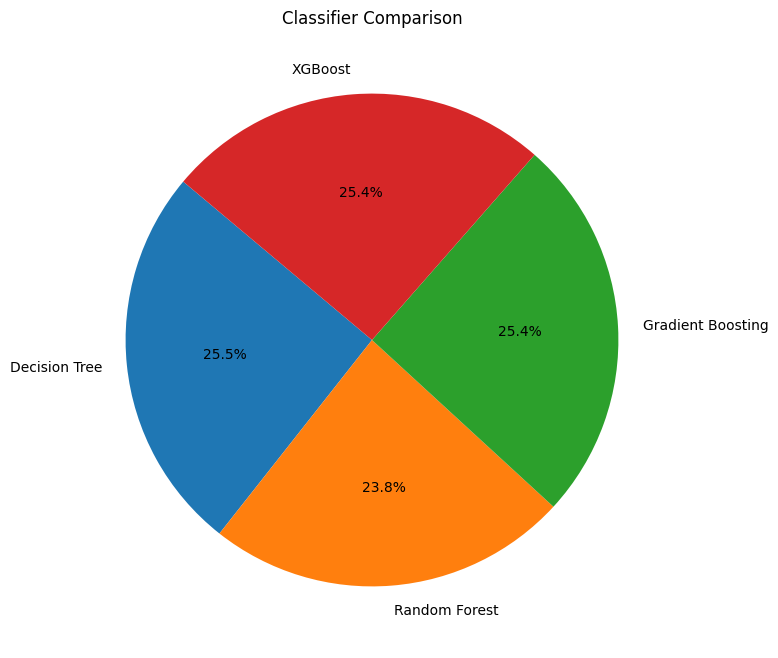

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load your dataset
# Replace 'your_dataset.csv' with the actual file path
df = pd.read_csv('/content/drive/MyDrive/insurance_claims.csv')

# Separate features (X) and target variable (y)
X = df.drop('fraud_reported', axis=1)
y = df['fraud_reported']

# Define categorical and numeric features
categorical_features = ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
                         'insured_occupation', 'insured_hobbies', 'insured_relationship',
                         'incident_type', 'collision_type', 'incident_severity',
                         'authorities_contacted', 'incident_state', 'incident_city',
                         'police_report_available', 'auto_make', 'auto_model']

numeric_features = ['months_as_customer', 'age', 'policy_number', 'policy_deductable',
                     'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains',
                     'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved',
                     'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim',
                     'property_claim', 'vehicle_claim', 'auto_year']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
y_train = y_train.map({'N': 0, 'Y': 1})
y_test = y_test.map({'N': 0, 'Y': 1})


# Create transformers for preprocessing
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))
])

# Create preprocessor with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create classifiers
classifiers = [
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(random_state=42))
]

# Train and evaluate each classifier
results = []

for name, classifier in classifiers:
    model = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', classifier)])
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cv_matrix = confusion_matrix(y_test, y_pred)

    results.append({
        'Classifier': name,
        'Accuracy': accuracy,
        'Confusion_Matrix': cv_matrix
    })

# Display the results
for result in results:
    print(f"\nClassifier: {result['Classifier']}")
    print(f"Accuracy: {result['Accuracy']:.4f}")
    print("Confusion Matrix:")
    print(result['Confusion_Matrix'])
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Compare classifiers with a pie chart
result_df = pd.DataFrame(results)
plt.figure(figsize=(8, 8))
plt.pie(result_df['Accuracy'], labels=result_df['Classifier'], autopct='%1.1f%%', startangle=140)
plt.title('Classifier Comparison')
plt.show()